In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

LOAD THE DATASET

In [3]:
data= pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [4]:
data.sample(9)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
6502,OD6503,Shree,Oil & Masala,Spices,Cumbum,8/20/2018,East,1933,0.23,715.21,Tamil Nadu
1867,OD1868,Shah,Beverages,Soft Drinks,Nagercoil,07-07-2017,West,688,0.17,151.36,Tamil Nadu
1281,OD1282,Esther,Snacks,Cookies,Dharmapuri,09-12-2015,East,2083,0.16,770.71,Tamil Nadu
9399,OD9400,Akash,"Eggs, Meat & Fish",Eggs,Virudhunagar,3/26/2018,South,1920,0.12,537.60,Tamil Nadu
6052,OD6053,Ridhesh,Snacks,Noodles,Trichy,06-06-2015,East,657,0.28,98.55,Tamil Nadu
4278,OD4279,Anu,Beverages,Health Drinks,Cumbum,05-12-2017,West,1091,0.35,349.12,Tamil Nadu
1754,OD1755,Arvind,Food Grains,Dals & Pulses,Tirunelveli,09-04-2018,South,2122,0.33,742.70,Tamil Nadu
5924,OD5925,James,Fruits & Veggies,Fresh Fruits,Salem,05-11-2015,Central,973,0.20,214.06,Tamil Nadu
2638,OD2639,Willams,"Eggs, Meat & Fish",Mutton,Pudukottai,7/20/2016,Central,1671,0.22,100.26,Tamil Nadu


In [5]:
#CHECKING MISSING VALUES
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [6]:
#CHECKING NULL
data.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [7]:
data.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [8]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m-%d-%Y', errors='coerce')

In [9]:
# Extract the year,Month,day
data['Month'] = data['Order Date'].dt.month
data['Day'] = data['Order Date'].dt.day
data['Year'] = data['Order Date'].dt.year

In [10]:
data['Year'].unique()

array([2017., 2016., 2015.,   nan, 2018.])

In [11]:
#data.drop('Order Date', axis=1, inplace=True)

In [12]:
#removing OD from orederid
data['Order ID'] = data['Order ID'].str.replace('OD', '', regex=False)
#convert OrderId into object into int
data['Order ID'] = data['Order ID'].astype(int)

In [13]:
data.select_dtypes(include=['object']).columns

Index(['Customer Name', 'Category', 'Sub Category', 'City', 'Region', 'State'], dtype='object')

In [14]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,Day,Year
0,1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11.0,8.0,2017.0
1,2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11.0,8.0,2017.0
2,3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6.0,12.0,2017.0
3,4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10.0,11.0,2016.0
4,5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10.0,11.0,2016.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   int32         
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
 11  Month          4042 non-null   float64       
 12  Day            4042 non-null   float64       
 13  Year           4042 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1), object(6)
memory u

In [16]:
# fill na values
data['Year'] = data['Year'].fillna(0).astype(int)
data['Month'] = data['Month'].fillna(0).astype(int)
data['Day'] = data['Day'].fillna(0).astype(int)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   int32         
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
 11  Month          9994 non-null   int32         
 12  Day            9994 non-null   int32         
 13  Year           9994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(6)
memory u

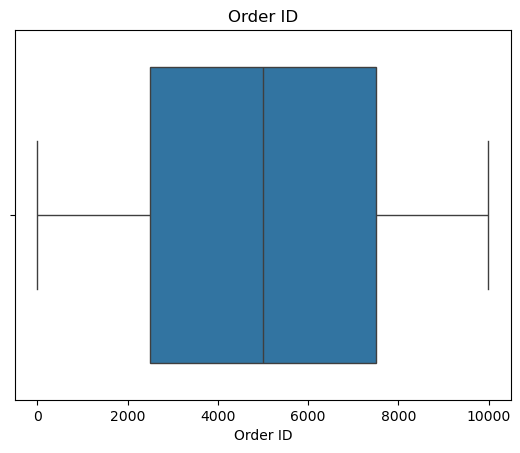

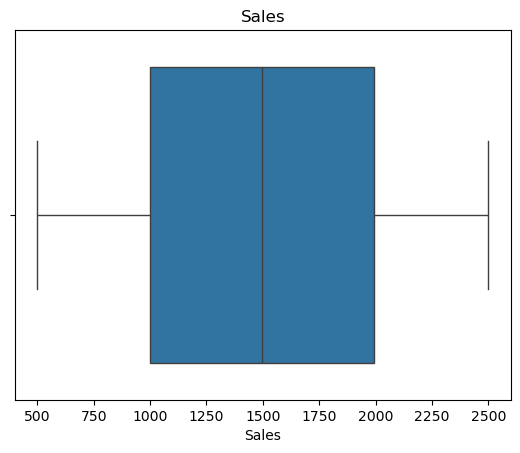

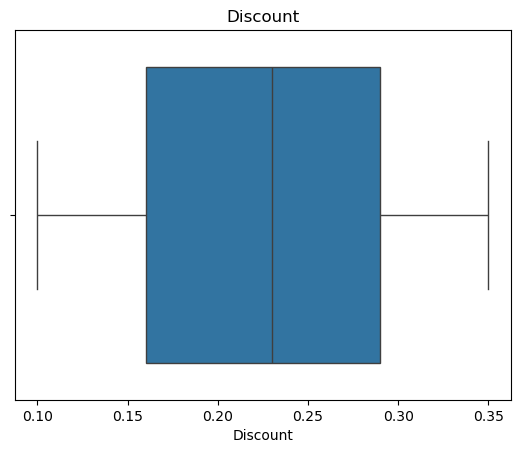

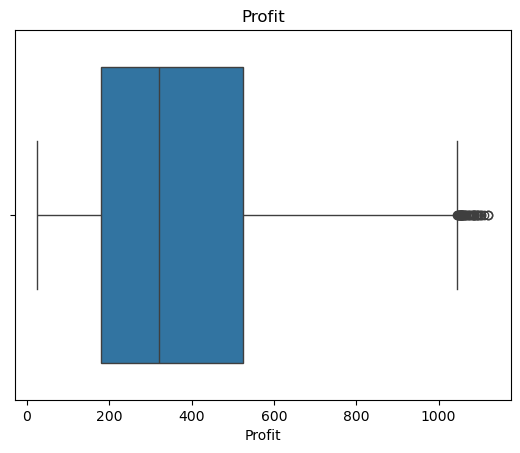

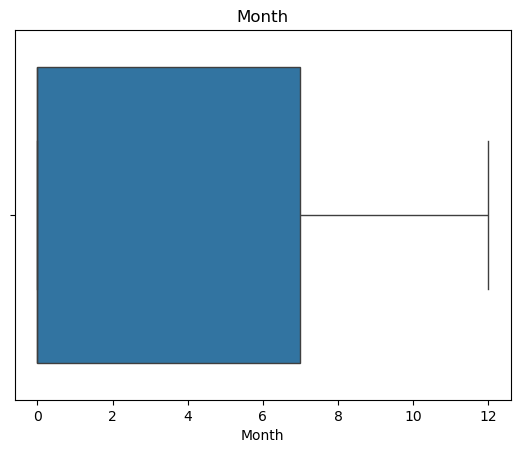

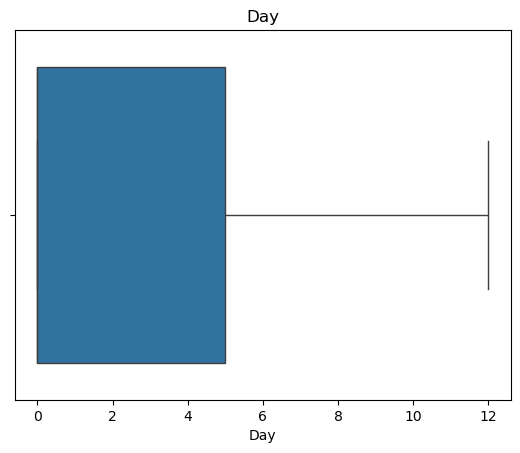

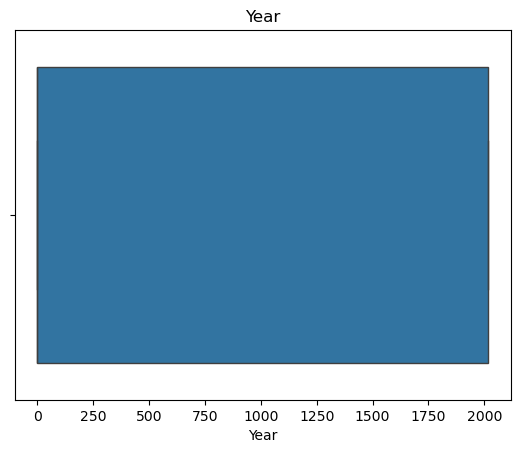

In [18]:
# This the how we create all boxplot with a single code
def outliers(x):
    y=x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=data[i])
        plt.title(i)
        plt.show()
outliers(data)

In [19]:
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,Day,Year
0,1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,8,2017
1,2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,8,2017
2,3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,12,2017
3,4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,11,2016
4,5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,NaT,West,945,0.16,359.10,Tamil Nadu,0,0,0
9990,9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,7,12,2015
9991,9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,6,6,2017
9992,9993,Peer,Oil & Masala,Spices,Pudukottai,NaT,West,1659,0.15,597.24,Tamil Nadu,0,0,0


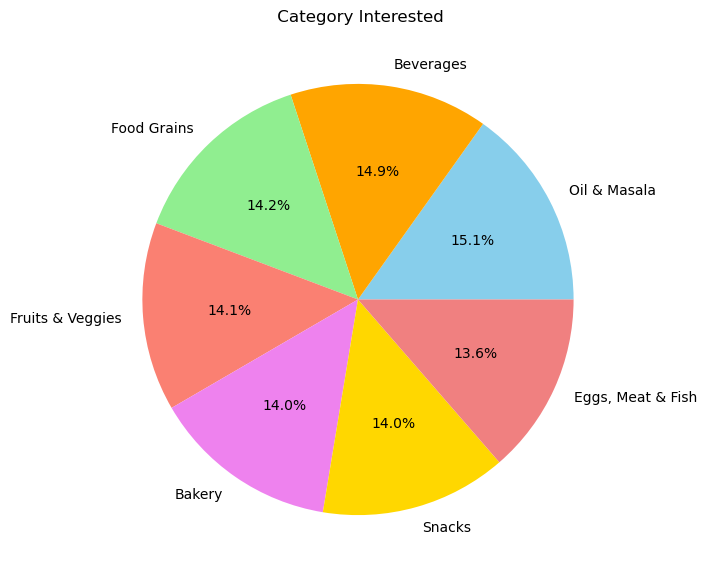

In [20]:
plt.figure(figsize=(13,7))
sizes=data['Category'].value_counts().values
labels=['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies','Bakery', 'Snacks', 'Eggs, Meat & Fish']
colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'violet', 'gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%')
plt.title(" Category Interested") 
# Show the plot
plt.show()  # Only this line should be used to display the plot


In [21]:
data['Sub Category'].unique()

array(['Masalas', 'Health Drinks', 'Atta & Flour', 'Fresh Vegetables',
       'Organic Staples', 'Fresh Fruits', 'Biscuits', 'Cakes',
       'Chocolates', 'Eggs', 'Cookies', 'Chicken', 'Edible Oil & Ghee',
       'Mutton', 'Soft Drinks', 'Dals & Pulses', 'Organic Vegetables',
       'Noodles', 'Organic Fruits', 'Fish', 'Spices', 'Rice',
       'Breads & Buns'], dtype=object)

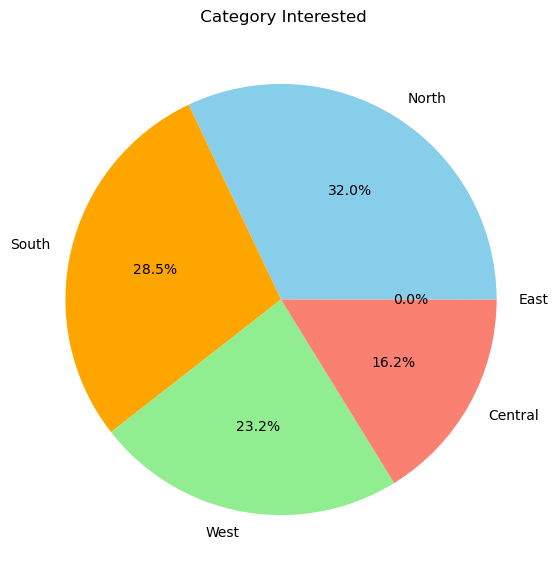

In [22]:
plt.figure(figsize=(13,7))
sizes=data['Region'].value_counts().values
labels=['North', 'South', 'West', 'Central', 'East']
colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'violet']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%')
plt.title(" Category Interested") 
# Show the plot
plt.show()  # Only this line should be used to display the plot


In [23]:
df4 = data[['City', 'Profit']]
df4.drop_duplicates()
df5 = df4.groupby(['City'])['Profit'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('City', ascending=False)
df5.head()

,Profit
City,
Virudhunagar,150816.69
Viluppuram,144200.64
Vellore,174073.01
Trichy,136059.94
Tirunelveli,165169.01


Text(0.5, 1.0, 'THE MAX AND MIN City Profits')

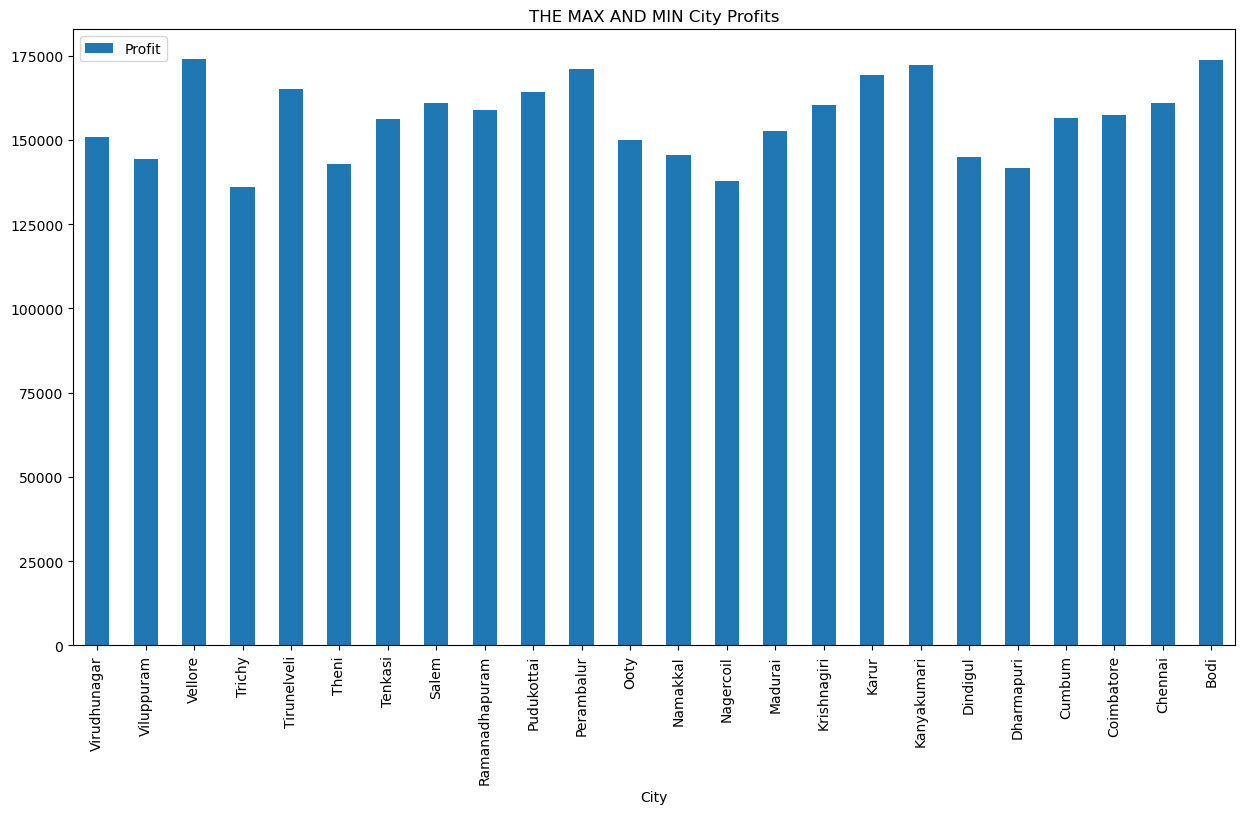

In [24]:
df5.plot(kind ='bar', figsize = (15,8))
plt.title("THE MAX AND MIN City Profits")

In [25]:
df4 = data[['Region', 'Sales']]
df4.drop_duplicates()
df6 = df4.groupby(['Region'])['Sales'].sum()
df6 = df6.to_frame()
df6 = df6.sort_values('Region', ascending=False)
df6.head()

,Sales
Region,
West,4798743
South,2440461
North,1254
East,4248368
Central,3468156


Text(0.5, 1.0, 'THE MAX AND MIN Sales')

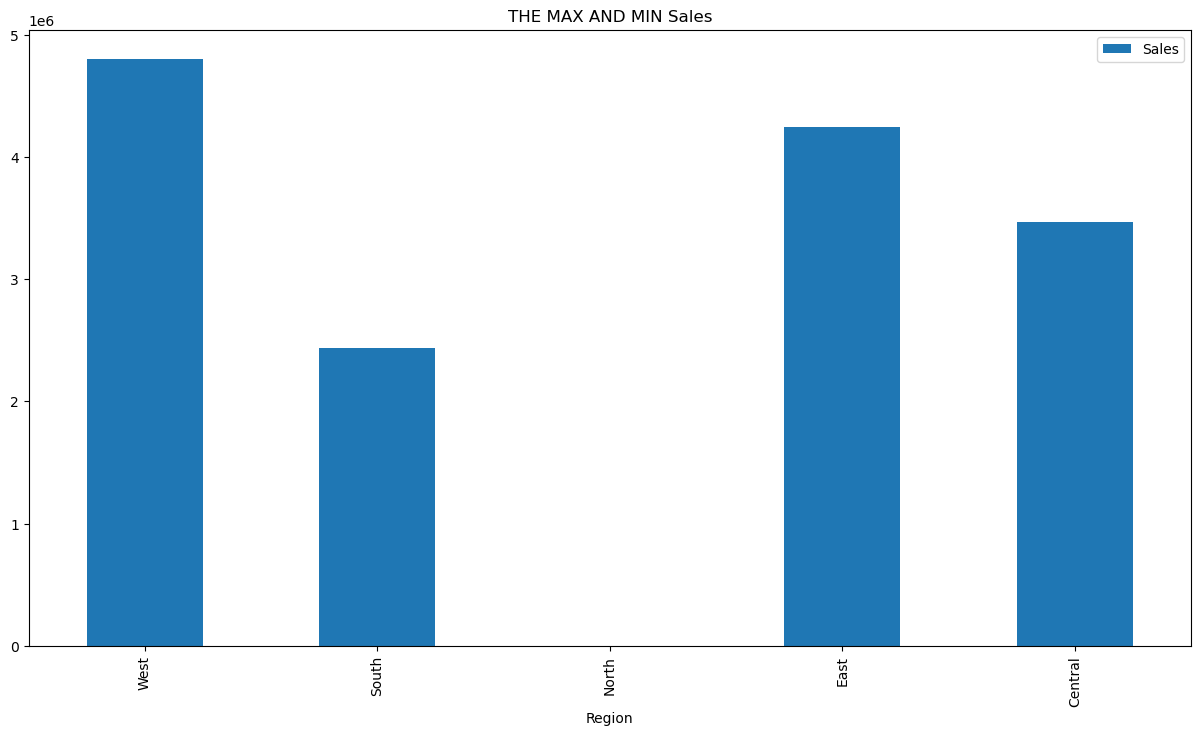

In [26]:
df6.plot(kind ='bar', figsize = (15,8))
plt.title("THE MAX AND MIN Sales")


In [27]:
for column in data.columns:
    print(data[column].value_counts())
    print("*-"*20)

Order ID
1       1
6666    1
6659    1
6660    1
6661    1
       ..
3333    1
3334    1
3335    1
3336    1
9994    1
Name: count, Length: 9994, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Customer Name
Amrish      227
Krithika    224
Verma       218
Arutra      218
Vidya       215
Shah        215
Suresh      212
Surya       209
Harish      208
Hussain     208
Sudeep      207
Komal       206
Veena       205
Mathew      205
Adavan      205
Ridhesh     204
Muneer      204
Peer        204
Veronica    203
Arvind      203
Vinne       203
Sharon      202
Haseena     202
Malik       201
Yusuf       201
Roshan      201
Shree       200
Ravi        200
Jonas       198
Alan        198
James       197
Ram         197
Amy         196
Akash       196
Willams     195
Sheeba      195
Rumaiza     195
Ganesh      193
Esther      189
Sudha       189
Vince       188
Ramesh      188
Sabeela     188
Sundar      187
Aditi       187
Anu         186
Yadav       185
Jackson     182
Kumar       181
Ha

In [28]:
data['Year'] = data['Year'].fillna(0).astype(int)  
data['Day'] = data['Day'].fillna(0).astype(int)  
data['Month'] = data['Month'].fillna(0).astype(int)  


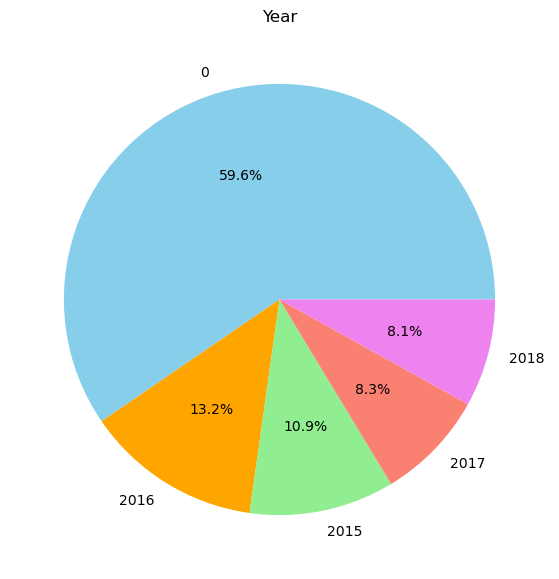

In [29]:
#YEAR 
plt.figure(figsize=(13,7))
sizes=data['Year'].value_counts().values
labels=['0', '2016', '2015', '2017', '2018']
colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'violet']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%')
plt.title("Year") 
# Show the plot
plt.show()  # Only this line should be used to display the plot


(array([260., 252., 264., 251., 254., 277., 216., 250., 239., 235., 236.,
        265., 243., 232., 238., 272., 242., 264., 258., 254., 265., 277.,
        274., 226., 238., 250., 259., 238., 247., 242., 239., 256., 254.,
        244., 231., 239., 252., 271., 252., 238.]),
 array([ 500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,  900.,
         950., 1000., 1050., 1100., 1150., 1200., 1250., 1300., 1350.,
        1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750., 1800.,
        1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200., 2250.,
        2300., 2350., 2400., 2450., 2500.]),
 <BarContainer object of 40 artists>)

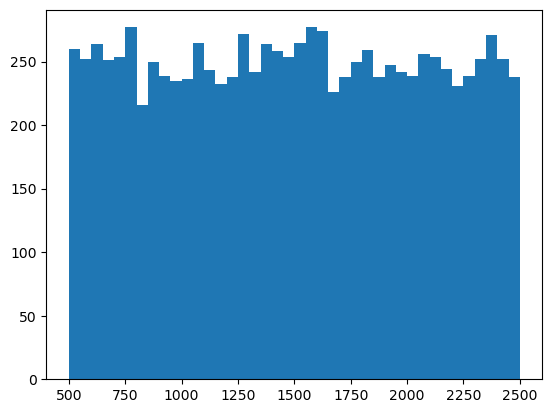

In [30]:
plt.hist(data['Sales'],bins=40)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   int32         
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
 11  Month          9994 non-null   int32         
 12  Day            9994 non-null   int32         
 13  Year           9994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(6)
memory u

<Axes: xlabel='count', ylabel='Sub Category'>

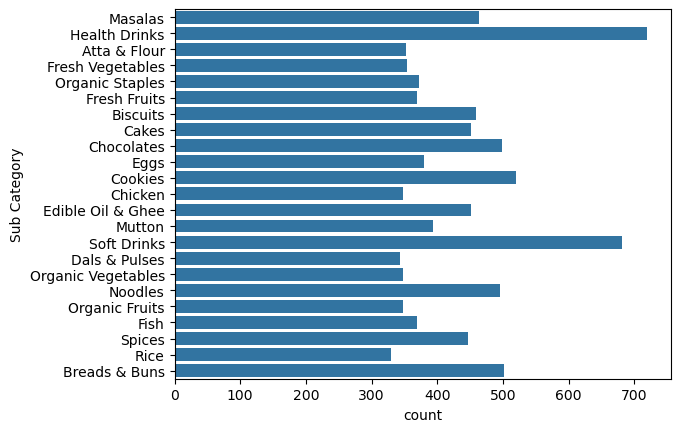

In [32]:
sns.countplot(data['Sub Category'])

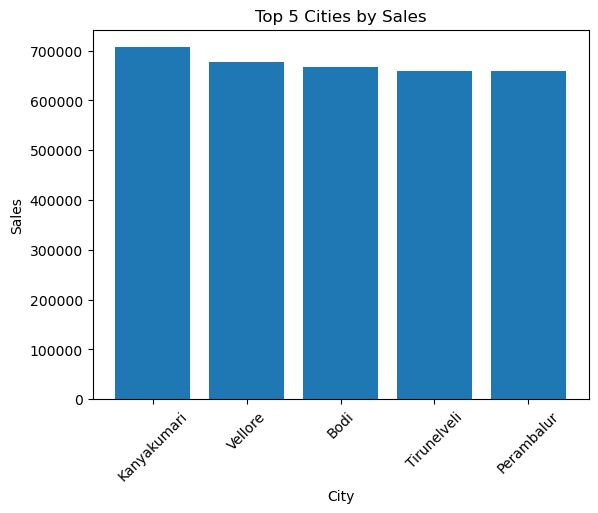

In [33]:
city_sales = data[['City', 'Sales']]
total = city_sales.groupby('City').sum()
# Step 3: Sort the cities by sales
sorted_cities = total.sort_values(by='Sales', ascending=False)
# Step 4: Select the top 5 cities
top_cities = sorted_cities.head(5)
# Step 5: Plot the bar chart
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()

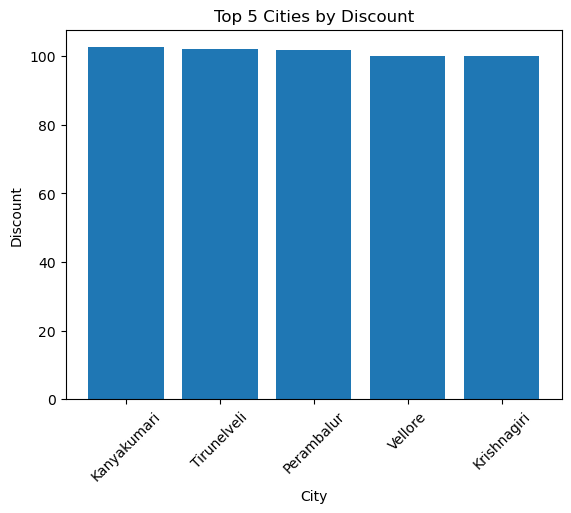

In [34]:
city_sales = data[['City', 'Discount']]
total_sales = city_sales.groupby('City').sum()
sorted_cities = total_sales.sort_values(by='Discount', ascending=False)
top_cities = sorted_cities.head(5)
plt.bar(top_cities.index, top_cities['Discount'])
plt.xlabel('City')
plt.ylabel('Discount')
plt.title('Top 5 Cities by Discount')
plt.xticks(rotation=45)
plt.show()

In [35]:
#convert categorical variables into numberical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Category']=le.fit_transform(data['Category'])
data['Sub Category']=le.fit_transform(data['Sub Category'])
data['City']=le.fit_transform(data['City'])

data['Region']=le.fit_transform(data['Region'])


In [36]:
data


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,Day,Year
0,1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,Tamil Nadu,11,8,2017
1,2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,Tamil Nadu,11,8,2017
2,3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,Tamil Nadu,6,12,2017
3,4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,Tamil Nadu,10,11,2016
4,5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,Tamil Nadu,10,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,Sudeep,2,9,9,NaT,4,945,0.16,359.10,Tamil Nadu,0,0,0
9990,9991,Alan,0,1,6,2015-07-12,4,1195,0.26,71.70,Tamil Nadu,7,12,2015
9991,9992,Ravi,3,20,0,2017-06-06,4,1567,0.16,501.44,Tamil Nadu,6,6,2017
9992,9993,Peer,5,22,14,NaT,4,1659,0.15,597.24,Tamil Nadu,0,0,0
